#Topic Modelling using BERTopic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
import pandas as pd
# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/NLP Cuối kỳ/crawl_data_vietnamnet_tho.csv')
data.head()

,title,description,topic
0,"Đánh bại U23 Trung Quốc, Hàn Quốc có vé sớm và...",U23 Hàn Quốc có chiến thắng dễ dàng trước U23 ...,thể thao
1,Zidane 'đạt thỏa thuận' dẫn dắt Bayern Munich,Nguồn tin độc quyền từ Mundo Deportivo cho hay...,thể thao
2,MU reo vui khi Sancho và Dortmund vào bán kết C1,MU được nhận khoản tiền đáng kể sau khi Dortmu...,thể thao
3,"Tuyển futsal Việt Nam vượt qua Trung Quốc, giữ...",ĐT futsal Việt Nam vất vả đánh bại Trung Quốc ...,thể thao
4,KUN Happy Run Cần Thơ 2024: Anta Kids tài trợ ...,Dành tặng 1.500 áo đấu cho các vận động viên “...,thể thao


In [ ]:
#Tạo một cột mới chứa độ dài mỗi dòng tiêu đề
data["headline_text_len"] = data["title"].apply(lambda x : len(x.split()))

In [ ]:
print("The longest headline has: {} words".format(data.headline_text_len.max()))

The longest headline has: 21 words


Trực quan hóa phân bố độ dài

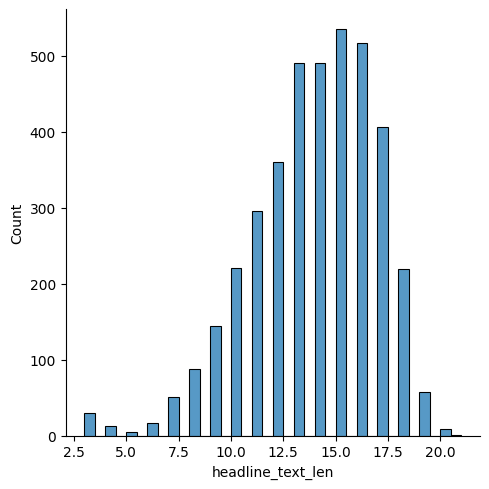

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.headline_text_len, kde=False)

In [ ]:
for idx in data.sample(3).index:
    headline = data.iloc[idx]
    print("Headline #{}:".format(idx))
    # print("Publication date: {}".format(headline.article_date))
    print("Text: {}\n".format(headline.title))

Headline #1871:
Text: Sách Tết Giáp Thìn, giai phẩm mùa xuân

Headline #2524:
Text: 'Qua đêm ở nhà các vua Nguyễn'

Headline #2297:
Text: 7 cuốn sách tỷ phú Elon Musk khuyên mọi người nên đọc



## Topic Modeling

Trong ví dụ này, tìm hiểu các thành phần chính của BERTopic và các bước cần thiết để tạo mô hình chủ đề mạnh mẽ.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 19.7 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [ ]:
from bertopic import BERTopic

model = BERTopic(verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=7)
headline_topics, _ = model.fit_transform(data.title)
print(headline_topics)


##Topic Extraction and Representation

In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

In [ ]:
a_topic = freq.iloc[1]["Topic"]
model.get_topic(a_topic)

## Topics Visualization

### Topic Terms

In [ ]:
model.visualize_barchart(top_n_topics=7)

### Intertopic Distance Map

In [ ]:
model.visualize_topics()


### Visualize Topic Hierarchy

In [ ]:
model.visualize_hierarchy(top_n_topics=5)

## Search Topics

In [ ]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("politics", top_n = 3)

In [ ]:
similar_topics

In [ ]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

#Topic Modelling using LDA

In [ ]:
import tensorflow as tf
import pandas as pd
import string
import re
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import nltk
import spacy
import sys
from spacy.lang.en import English
import en_core_web_sm
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

print(tf.__version__)  # 2.0.0-beta0

In [ ]:
df = pd.read_csv("/content/crawl_data_vietnamnet_tho.csv")
df = df[['title', 'topic']]
df.head()

In [ ]:
df.title.isnull().any() # no missing values in is_sarcastic column
df.topic.isnull().any()

In [ ]:
df['title'] = df.title.apply(lambda x:x.lower())  # convert all words in headline into lower case
df['title'] = df.title.apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))  # remove all punctuations in headline

In [ ]:
df['Title_count'] = df.title.apply(lambda x: len(list(x.split())))
df['Title_unique_word_count'] = df.title.apply(lambda x: len(set(x.split())))
df['Title_has_digits'] = df.title.apply(lambda x: bool(re.search(r'\d', x)))
df

In [ ]:
df['topic'].value_counts()

In [ ]:
topic_dat = df.groupby('topic').count()
topic_dat.index = ['chính trị','văn hoá','thế giới','thời sự','thể thao']
plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Bảng thống kê loại tiêu đề')
bar_graph = plt.bar(topic_dat.index, topic_dat.Title_count)
bar_graph[1].set_color('r')
plt.show()
round(topic_dat.Title_count / topic_dat.Title_count.sum(), 1)

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
nlp = en_core_web_sm.load()
parser = English()
en_stop = set(nltk.corpus.stopwords.words('english'))


def tokenize(text):
    """mã hóa dòng tiêu đề thành một danh sách các từ riêng lẻ"""
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace(): # bỏ qua mọi khoảng trắng trong tiêu đề, để danh sách mã thông báo không chứa khoảng trắng
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)   # tokens (headlines) are already in lowercase
    return lda_tokens


def get_lemma(word):
    """ bổ nghĩa các từ trong tiêu đề thành dạng gốc của nó"""
    lemma = wn.morphy(word)  # converts the word into root form from wordnet
    if lemma is None:
        return word
    else:
        return lemma


def prepare_text_for_lda(text):
    tokens = tokenize(text)  # parse and tokenize the headline into a list of words
    tokens = [token for token in tokens if len(token) > 4]  # remove headlines with only length of 4 words or less
    tokens = [token for token in tokens if token not in en_stop]  # remove stopwords in the headline
    tokens = [get_lemma(token) for token in tokens]  # lemmatize the words in the headline
    return tokens

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
text_data = []
for title in df.title:
    tokens = prepare_text_for_lda(title)
    text_data.append(tokens)

In [ ]:
from gensim import corpora
import pickle

dictionary = corpora.Dictionary(text_data)  # Chuyển đổi tất cả các tiêu đề thành một tập hợp các từ, với mỗi từ là một mã thông báo
corpus = [dictionary.doc2bow(text) for text in text_data]  # Chuyển từng dòng tiêu đề (danh sách các từ) sang định dạng túi từ. (ID từ, Số từ)
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [ ]:
import gensim

NUM_TOPICS = [3, 5, 10]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS[1], id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=5)
topics

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=5)
topics

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=5)
topics

In [ ]:
!pip install pyLDAvis

Bản đồ khoảng cách liên chủ đề (thông qua tỷ lệ đa chiều)

Top 30 thuật ngữ phù hợp nhất cho các chủ đề

In [ ]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [ ]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

In [ ]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df['topic'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



topic
văn hoá      1450
chính trị     675
thế giới      658
thời sự       650
thể thao      515
Name: count, dtype: int64

In [ ]:
from numpy import mean

topic = list(df.topic == "thể thao")
tuple_list = []
for headline in topic:
    topic = lda10[corpus[headline]]
    for tuple_ in topic:
        tuple_list.append(tuple_)

print('\nFor thể thao Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

topic1 = list(df.topic == "chính trị")
tuple_list = []
for headline in topic1:
    topic1 = lda10[corpus[headline]]
    for tuple_ in topic1:
        tuple_list.append(tuple_)
print('For LDA model with 10 clusters:')
print('\nFor chính trị Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])


topic2 = list(df.topic == "thế giới")
tuple_list = []
for headline in topic2:
    sarcastic = lda10[corpus[headline]]
    for tuple_ in sarcastic:
        tuple_list.append(tuple_)
print('\nFor thế giới Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])
topic3 = list(df.topic == "thời sự")
tuple_list = []
for headline in topic3:
    topic3 = lda10[corpus[headline]]
    for tuple_ in topic3:
        tuple_list.append(tuple_)
print('\nFor thời sự Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

topic4 = list(df.topic == "văn hóa")
tuple_list = []
for headline in topic4:
    topic4 = lda10[corpus[headline]]
    for tuple_ in topic4:
        tuple_list.append(tuple_)
print('\nFor văn hóa Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




For thể thao Dataset:
[(0, 0.046087), (1, 0.04608687), (2, 0.48085213), (3, 0.0722939), (4, 0.046093315), (5, 0.04608687), (6, 0.04608687), (7, 0.09814998), (8, 0.07217597), (9, 0.046087116)]
For LDA model with 10 clusters:

For chính trị Dataset:
[(0, 0.044871286), (1, 0.04487112), (2, 0.4593735), (3, 0.07921841), (4, 0.044877265), (5, 0.04487112), (6, 0.04487112), (7, 0.11310919), (8, 0.07906557), (9, 0.044871442)]

For thế giới Dataset:
[(0, 0.045000456), (1, 0.045000296), (2, 0.46165562), (3, 0.07848268), (4, 0.045006484), (5, 0.045000296), (6, 0.045000296), (7, 0.11151976), (8, 0.07833355), (9, 0.045000605)]

For thời sự Dataset:
[(0, 0.04506124), (1, 0.04506108), (2, 0.46272954), (3, 0.07813645), (4, 0.04506728), (5, 0.04506108), (6, 0.04506108), (7, 0.110771805), (8, 0.07798908), (9, 0.04506139)]

For văn hóa Dataset:
[(0, 0.050000068), (1, 0.050000068), (2, 0.5499864), (3, 0.050005633), (4, 0.05000748), (5, 0.050000068), (6, 0.050000068), (7, 0.050000068), (8, 0.050000068), (9

# DEEP LEARNING

## RNN with GRU sử dụng L1

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, BatchNormalization, Dropout
import tensorflow as tf


In [ ]:

df = pd.read_csv("/content/drive/MyDrive/NLP Cuối kỳ/crawl_data_vietnamnet_tho.csv")
df = df[['title', 'topic']]
df.head()



,title,topic
0,"Đánh bại U23 Trung Quốc, Hàn Quốc có vé sớm và...",thể thao
1,Zidane 'đạt thỏa thuận' dẫn dắt Bayern Munich,thể thao
2,MU reo vui khi Sancho và Dortmund vào bán kết C1,thể thao
3,"Tuyển futsal Việt Nam vượt qua Trung Quốc, giữ...",thể thao
4,KUN Happy Run Cần Thơ 2024: Anta Kids tài trợ ...,thể thao


In [ ]:

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data = train_test_split(df[['title', 'topic']], test_size=0.2)

# Lấy danh sách các câu huấn luyện và nhãn tương ứng
training_sentences = list(train_data['title'])
training_labels = list(train_data['topic'])

testing_sentences = list(test_data['title'])
testing_labels = list(test_data['topic'])

In [ ]:
# Khởi tạo và tạo tokenizer
vocab_size = 10000   # Giới hạn từ vựng
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

# Chuẩn bị dữ liệu đầu vào
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

# Chuyển đổi nhãn thành dạng nhị phân
label_map = {
    'văn hoá': 0,
    'chính trị': 1,
    'thế giới': 2,
    'thời sự': 3,
    'thể thao': 4
}

training_labels_final = np.array([label_map[label] for label in training_labels])
testing_labels_final = np.array([label_map[label] for label in testing_labels])


In [ ]:
# Định nghĩa mô hình với BiRNN (GRU)
# với Chính quy L1, để lựa chọn tính năng ,giảm các trọng số của mô hình về gần 0, loại bỏ hoặc giảm bớt tác động của các đặc trưng không quan trọng trong dự đoán.
# Xây dựng mô hình RNN with GRU
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(50,activation='relu'),
    Dropout(0.5),
    Dense(5,kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='softmax')
])

# Compile mô hình
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
# Huấn luyện mô hình
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))


Epoch 1/20
50/50 [==============================] - 17s 167ms/step - loss: 1.6473 - accuracy: 0.3360 - val_loss: 1.6624 - val_accuracy: 0.3646
Epoch 2/20
50/50 [==============================] - 4s 66ms/step - loss: 1.1596 - accuracy: 0.5776 - val_loss: 1.5240 - val_accuracy: 0.4519
Epoch 3/20
50/50 [==============================] - 3s 57ms/step - loss: 0.7067 - accuracy: 0.7147 - val_loss: 1.4632 - val_accuracy: 0.4165
Epoch 4/20
50/50 [==============================] - 3s 57ms/step - loss: 0.5214 - accuracy: 0.7932 - val_loss: 1.2000 - val_accuracy: 0.4582
Epoch 5/20
50/50 [==============================] - 2s 39ms/step - loss: 0.4331 - accuracy: 0.8110 - val_loss: 0.9350 - val_accuracy: 0.6810
Epoch 6/20
50/50 [==============================] - 2s 37ms/step - loss: 0.4033 - accuracy: 0.8182 - val_loss: 0.7809 - val_accuracy: 0.6975
Epoch 7/20
50/50 [==============================] - 1s 27ms/step - loss: 0.3946 - accuracy: 0.8192 - val_loss: 0.8461 - val_accuracy: 0.6532
Epoch 8/20


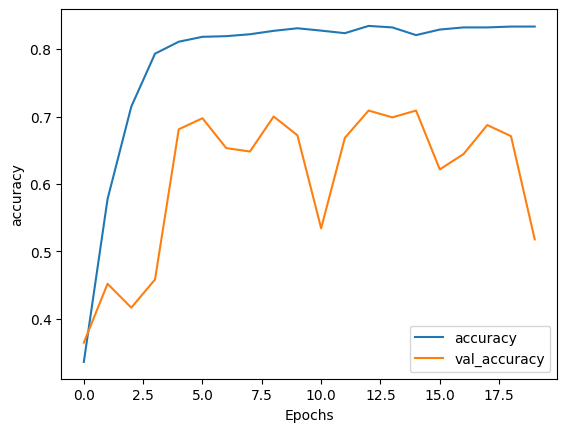

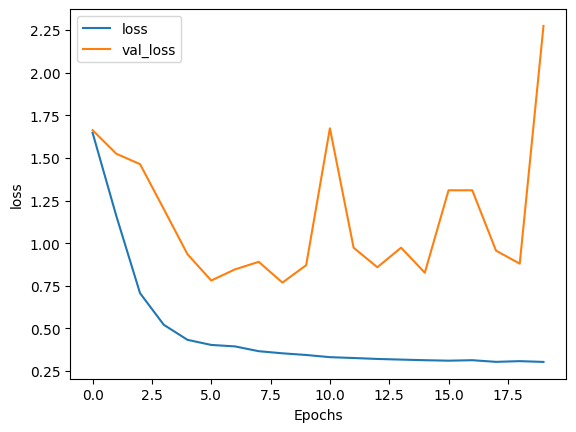

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
plt.show()

In [ ]:
results = model.evaluate(testing_padded, testing_labels_final, batch_size=128)
print("test loss, test acc:", results)


7/7 [==============================] - 0s 12ms/step - loss: 2.2735 - accuracy: 0.5177
test loss, test acc: [2.273491382598877, 0.5177215337753296]


In [ ]:
results = model.evaluate(padded, training_labels_final , batch_size=128,verbose=2)
print("train loss, train acc:", results)

25/25 - 0s - loss: 0.9685 - accuracy: 0.6400 - 253ms/epoch - 10ms/step
train loss, train acc: [0.9684575200080872, 0.6399620175361633]


In [ ]:
model.save('/content/drive/MyDrive/NLP Cuối kỳ/RNN_GRU_L1')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/NLP Cuối kỳ/RNN_GRU_L1')


### Train accuracy: 86%, test accuracy: 65%

## RNN with GRU sử dụng L2

In [ ]:
# Model Definition with BiRNN (GRU)
# with L2 Ridge Regularization
# giảm over fitting
# Chuẩn hóa hàng loạt, để ổn định và có thể đẩy nhanh quá trình học tập

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 100)               6500      
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)               

In [ ]:
# Huấn luyện mô hình
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))


Epoch 1/20
50/50 [==============================] - 13s 176ms/step - loss: 1.7331 - accuracy: 0.3642 - val_loss: 1.7299 - val_accuracy: 0.3646
Epoch 2/20
50/50 [==============================] - 3s 57ms/step - loss: 1.2538 - accuracy: 0.5272 - val_loss: 1.5573 - val_accuracy: 0.4089
Epoch 3/20
50/50 [==============================] - 2s 40ms/step - loss: 0.8445 - accuracy: 0.6906 - val_loss: 1.4492 - val_accuracy: 0.4152
Epoch 4/20
50/50 [==============================] - 2s 43ms/step - loss: 0.5755 - accuracy: 0.7758 - val_loss: 1.2152 - val_accuracy: 0.5456
Epoch 5/20
50/50 [==============================] - 1s 26ms/step - loss: 0.4785 - accuracy: 0.7951 - val_loss: 0.9785 - val_accuracy: 0.6595
Epoch 6/20
50/50 [==============================] - 2s 31ms/step - loss: 0.4014 - accuracy: 0.8141 - val_loss: 0.9350 - val_accuracy: 0.6228
Epoch 7/20
50/50 [==============================] - 1s 28ms/step - loss: 0.3703 - accuracy: 0.8122 - val_loss: 1.0236 - val_accuracy: 0.5646
Epoch 8/20


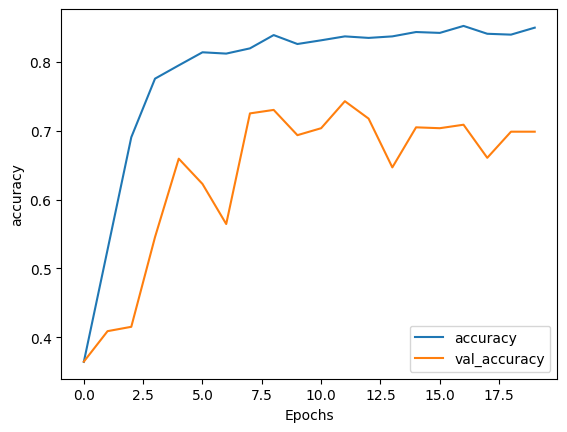

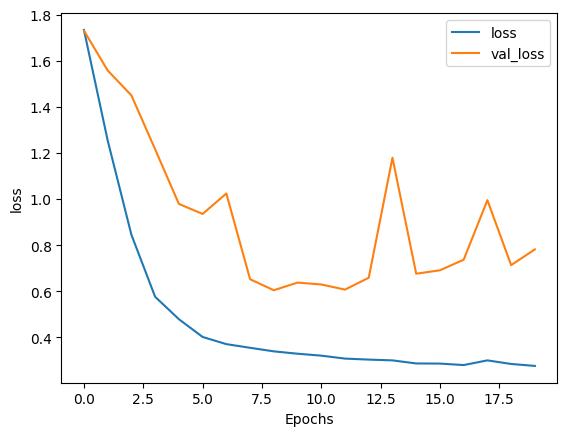

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
plt.show()

In [ ]:
results = model.evaluate(testing_padded, testing_labels_final, batch_size=128,verbose=2)
print("test loss, test acc:", results)

7/7 - 0s - loss: 0.7812 - accuracy: 0.6987 - 71ms/epoch - 10ms/step
test loss, test acc: [0.7812194228172302, 0.6987341642379761]


In [ ]:
results = model.evaluate(padded, training_labels_final , batch_size=128,verbose=2)
print("train loss, train acc:", results)

25/25 - 0s - loss: 0.2685 - accuracy: 0.8521 - 210ms/epoch - 8ms/step
train loss, train acc: [0.2684881091117859, 0.8521215915679932]


In [ ]:
model.save('/content/drive/MyDrive/NLP Cuối kỳ/RNN_GRU_L2')

### TRAIN ACCURACY: 85% TEST ACCURACY: 70%

## RNN with LSTM sử dụng L1

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense


# Xây dựng mô hình RNN with LSTM
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32)),
    Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    BatchNormalization(),
    Dense(50,kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    Dropout(0.5),
    Dense(5,kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='softmax')
])

# Compile mô hình
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))


Epoch 1/20
50/50 [==============================] - 14s 158ms/step - loss: 4.2403 - accuracy: 0.3847 - val_loss: 3.6279 - val_accuracy: 0.3646
Epoch 2/20
50/50 [==============================] - 4s 78ms/step - loss: 2.6311 - accuracy: 0.6305 - val_loss: 2.6267 - val_accuracy: 0.4987
Epoch 3/20
50/50 [==============================] - 2s 50ms/step - loss: 1.5628 - accuracy: 0.7606 - val_loss: 1.9529 - val_accuracy: 0.6165
Epoch 4/20
50/50 [==============================] - 2s 41ms/step - loss: 1.0215 - accuracy: 0.7958 - val_loss: 1.5680 - val_accuracy: 0.7177
Epoch 5/20
50/50 [==============================] - 1s 20ms/step - loss: 0.8231 - accuracy: 0.8046 - val_loss: 1.4018 - val_accuracy: 0.6911
Epoch 6/20
50/50 [==============================] - 1s 21ms/step - loss: 0.7232 - accuracy: 0.8179 - val_loss: 1.1973 - val_accuracy: 0.7165
Epoch 7/20
50/50 [==============================] - 1s 26ms/step - loss: 0.6675 - accuracy: 0.8243 - val_loss: 1.1700 - val_accuracy: 0.6962
Epoch 8/20


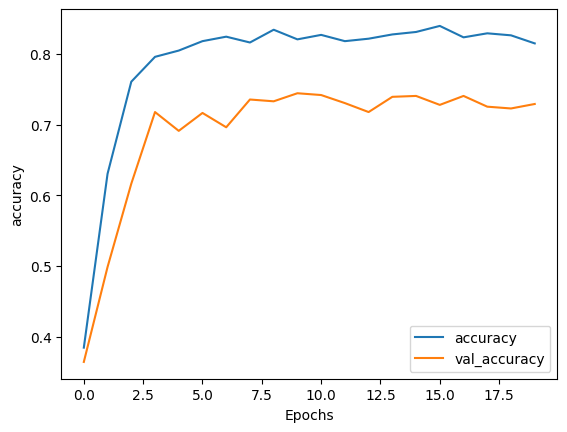

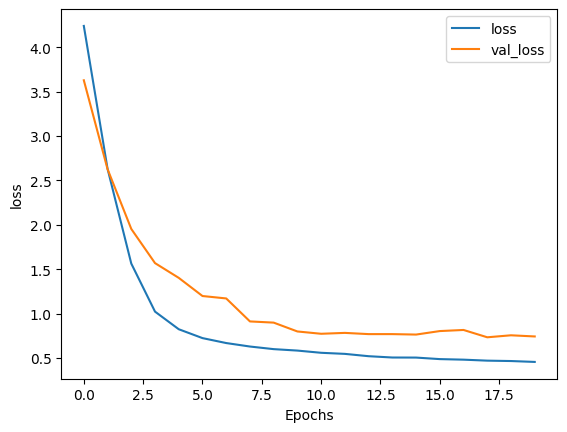

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
plt.show()

In [ ]:
results = model.evaluate(padded, training_labels_final , batch_size=128,verbose=2)
print("train loss, train acc:", results)

25/25 - 0s - loss: 0.4226 - accuracy: 0.8309 - 205ms/epoch - 8ms/step
train loss, train acc: [0.4226032793521881, 0.8309056162834167]


In [ ]:
results = model.evaluate(testing_padded, testing_labels_final, batch_size=128,verbose=2)
print("test loss, test acc:", results)

7/7 - 0s - loss: 0.7418 - accuracy: 0.7291 - 68ms/epoch - 10ms/step
test loss, test acc: [0.7417805790901184, 0.7291139364242554]


In [ ]:
model.save('/content/drive/MyDrive/NLP Cuối kỳ/RNN_LSTM_L1')

### Train accuracy: 83%, test accuracy: 75%

## RNN with LSTM sử dụng L2


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50,kernel_regularizer=tf.keras.regularizers.l2(0.003),activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_15 (Dense)            (None, 100)               6500      
                                                                 
 batch_normalization_4 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)               

In [ ]:
# Huấn luyện mô hình
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))


Epoch 1/20
50/50 [==============================] - 17s 241ms/step - loss: 1.8097 - accuracy: 0.3961 - val_loss: 1.7858 - val_accuracy: 0.3671
Epoch 2/20
50/50 [==============================] - 2s 45ms/step - loss: 1.1107 - accuracy: 0.6472 - val_loss: 1.5638 - val_accuracy: 0.5380
Epoch 3/20
50/50 [==============================] - 6s 115ms/step - loss: 0.6641 - accuracy: 0.7809 - val_loss: 1.6477 - val_accuracy: 0.2886
Epoch 4/20
50/50 [==============================] - 2s 47ms/step - loss: 0.5235 - accuracy: 0.8157 - val_loss: 1.1765 - val_accuracy: 0.6620
Epoch 5/20
50/50 [==============================] - 1s 24ms/step - loss: 0.4566 - accuracy: 0.8192 - val_loss: 0.9671 - val_accuracy: 0.7405
Epoch 6/20
50/50 [==============================] - 1s 25ms/step - loss: 0.4284 - accuracy: 0.8189 - val_loss: 0.8684 - val_accuracy: 0.7392
Epoch 7/20
50/50 [==============================] - 1s 25ms/step - loss: 0.4003 - accuracy: 0.8277 - val_loss: 0.9529 - val_accuracy: 0.6848
Epoch 8/20

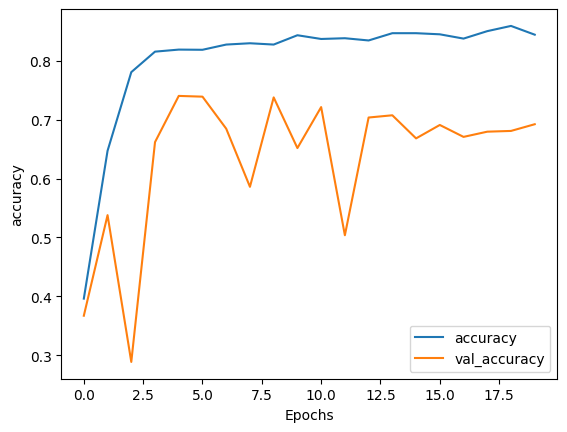

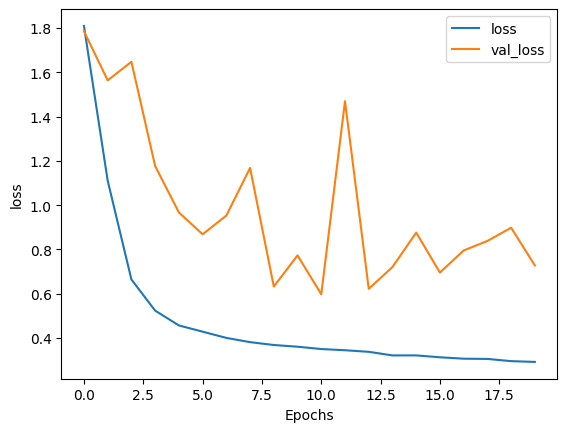

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
plt.show()

In [ ]:
results = model.evaluate(padded, training_labels_final , batch_size=128,verbose=2)
print("train loss, train acc:", results)

25/25 - 0s - loss: 0.2758 - accuracy: 0.8661 - 143ms/epoch - 6ms/step
train loss, train acc: [0.2758241593837738, 0.8660544753074646]


In [ ]:
results = model.evaluate(testing_padded, testing_labels_final, batch_size=128)
print("test loss, test acc:", results)


7/7 [==============================] - 0s 6ms/step - loss: 0.7278 - accuracy: 0.6924
test loss, test acc: [0.7278008460998535, 0.6924050450325012]


In [ ]:
model.save('/content/drive/MyDrive/NLP Cuối kỳ/RNN_LSTM_L2')

### Train accuracy: 85%, test accuracy: 71%

## CNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_length),
    tf.keras.layers.Conv1D(256, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 116, 256)          164096    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 29, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 25, 128)           163968    
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_18 (Dense)            (None, 200)              

In [ ]:
# Huấn luyện mô hình
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))


Epoch 1/50
50/50 [==============================] - 10s 104ms/step - loss: 1.5410 - accuracy: 0.3654 - val_loss: 1.4946 - val_accuracy: 0.3646
Epoch 2/50
50/50 [==============================] - 4s 76ms/step - loss: 1.1735 - accuracy: 0.4721 - val_loss: 0.9952 - val_accuracy: 0.5582
Epoch 3/50
50/50 [==============================] - 2s 33ms/step - loss: 0.7112 - accuracy: 0.6935 - val_loss: 0.6660 - val_accuracy: 0.7165
Epoch 4/50
50/50 [==============================] - 1s 24ms/step - loss: 0.4267 - accuracy: 0.7875 - val_loss: 0.6274 - val_accuracy: 0.7329
Epoch 5/50
50/50 [==============================] - 1s 21ms/step - loss: 0.3312 - accuracy: 0.8084 - val_loss: 0.6705 - val_accuracy: 0.7316
Epoch 6/50
50/50 [==============================] - 1s 13ms/step - loss: 0.2803 - accuracy: 0.8258 - val_loss: 0.7622 - val_accuracy: 0.7304
Epoch 7/50
50/50 [==============================] - 1s 15ms/step - loss: 0.2659 - accuracy: 0.8271 - val_loss: 0.7975 - val_accuracy: 0.7278
Epoch 8/50


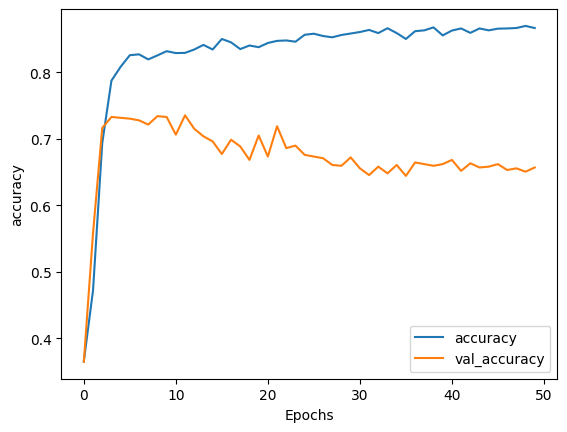

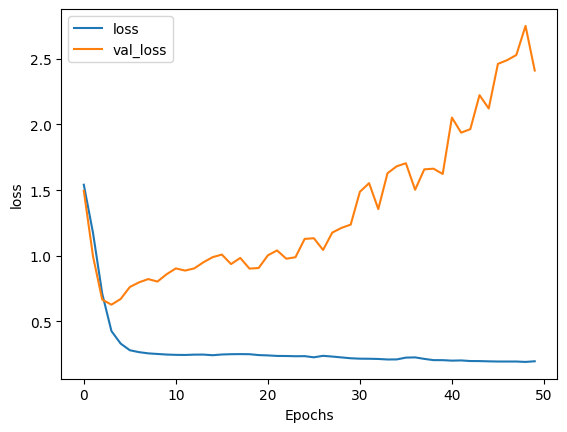

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
plt.show()

In [ ]:

results = model.evaluate(testing_padded, testing_labels_final, batch_size=128)
print("test loss, test acc:", results)


7/7 [==============================] - 1s 5ms/step - loss: 2.4109 - accuracy: 0.6570
test loss, test acc: [2.4108686447143555, 0.6569620370864868]


In [ ]:
results = model.evaluate(padded, training_labels_final , batch_size=128,verbose=2)
print("train loss, train acc:", results)

25/25 - 1s - loss: 0.1903 - accuracy: 0.8718 - 537ms/epoch - 21ms/step
train loss, train acc: [0.19029220938682556, 0.8717542886734009]


In [ ]:
model.save('/content/drive/MyDrive/NLP Cuối kỳ/CNN')

### Train acc: 87%, test_acc: 78%

In [ ]:
tf.keras.models.save_model(model, "topic_model")

25/25 [==============================] - 0s 2ms/step


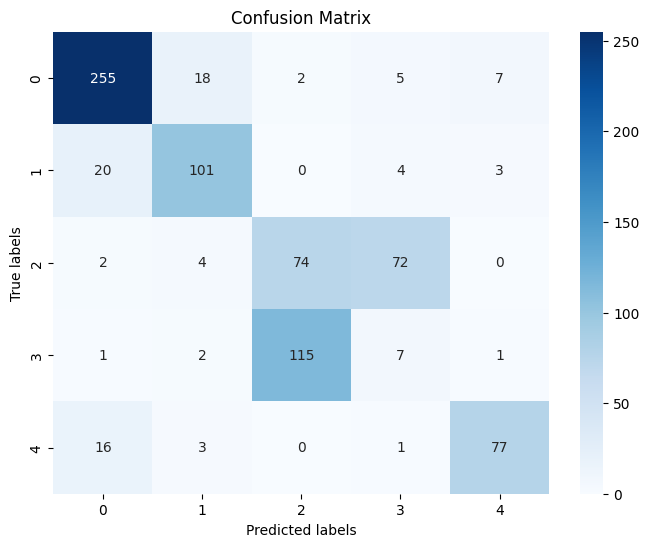

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đoán nhãn cho dữ liệu kiểm tra
predictions = model.predict(testing_padded)
predicted_labels = np.argmax(predictions, axis=1)

# Tạo confusion matrix
cm = confusion_matrix(testing_labels_final, predicted_labels)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
df['topic'].value_counts()

topic
văn hoá      1450
chính trị     675
thế giới      658
thời sự       650
thể thao      515
Name: count, dtype: int64

In [ ]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load mô hình đã lưu
model = tf.keras.models.load_model("topic_model")


text_to_predict = ["đá bóng"]

sequences = tokenizer.texts_to_sequences(text_to_predict)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

predictions = model.predict(padded)
predicted_label = np.argmax(predictions)
print("Predicted topic:", predicted_label)


1/1 [==============================] - 0s 214ms/step
Predicted topic: 4


CHÍNH XÁC predicted

KẾT QUẢ: VÌ CÓ NHIỀU LỚP TOPICS(5 LỚP) NÊN KẾT QUẢ CHO RA KHÔNG QUÁ CAO, VÌ NHẬN BIẾT ĐƯỢC CẢ 5 LỚP RẤT LÀ KHÓ, nhưng mà cũng khá tốt khi có thể input văn bản và predict ra topic